In [ ]:
####  Интеллектуальные вычислительные системы
####  АБЕНА Армель Фрэнк Малько 420-М1
####  Лабораторная работа №2
####  Вариант 2
####  Функция: z= cos(x) + sin(y – p/2);   x --> (-p <=x<= p);   y --> (-p <=y<= p);   z --> (-2 <=z<= 2)

In [2]:
# 
!pip install -U scikit-fuzzy

import numpy as np
import matplotlib.pyplot as plt
import math
import skfuzzy as fuzz
from skfuzzy import control as ctrl
!pip install tabulate
from tabulate import tabulate

In [3]:
num_terms = 5
X_start = -math.pi
X_end = math.pi
Y_start = -math.pi
Y_end = math.pi
Z_start = -2
Z_end = 2

X_step = (abs(X_start) + abs(X_end)) / num_terms
Y_step = (abs(Y_start) + abs(Y_end)) / num_terms
Z_step = (abs(Z_start) + abs(Z_end)) / num_terms
X = np.arange(X_start, X_end + X_step, X_step)
Y = np.arange(Y_start, Y_end + Y_step, Y_step)
Z = np.arange(Z_start, Z_end + Z_step, Z_step)

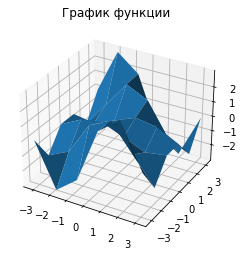

In [4]:
fix, ax = plt.subplots(subplot_kw={"projection": "3d"})
X_var, Y_var = np.meshgrid(X, Y)
Z_var = Y_var * np.sin(X_var + Y_var)
surface = ax.plot_surface(X_var,Y_var,Z_var)
ax.set_zlim()
plt.title('График функции')
plt.show(-2, 2)

In [5]:
def rules(start, end, num_terms, label):
  terms = []
  for i in np.arange(num_terms):
    terms.append(i)

  step = (abs(start) + abs(end)) / (num_terms - 1)
  func = ctrl.Antecedent(np.arange(start, end + step, step), label)
  ranges = [None] * num_terms
  for i in np.arange(0, num_terms, 1):
    triangle = []
    if i == 0:
      triangle = [start, start, start + step]
      ranges[i] = {}
      ranges[i]['start'] = triangle[1]
      ranges[i]['end'] = triangle[2] - (step / 2)
      ranges[i]['mid'] = triangle[1]
    else:
      triangle = [
                  (i - 1) * step - abs(start),
                  i * step - abs(start),
                  (i + 1) * step - abs(start)
      ]
      if num_terms - 1 == i:
        ranges[i] = {}
        ranges[i]['start'] = triangle[0] + (step / 2)
        ranges[i]['end'] = triangle[1]
        ranges[i]['mid'] = triangle[1]
      else:
        ranges[i] = {}
        ranges[i]['start'] = triangle[0] + (step / 2)
        ranges[i]['end'] = triangle[2] - (step / 2)
        ranges[i]['mid'] = triangle[1]
    func[terms[i]] = fuzz.trimf(func.universe, triangle)
  func.view()
  return ranges

ФП для Х:


/home/franck-malko/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


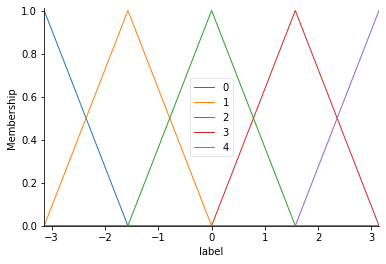

In [6]:
print("ФП для Х:")
ranges_X = rules(X[0], X[-1], num_terms, 'label')

ФП для Y:


/home/franck-malko/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


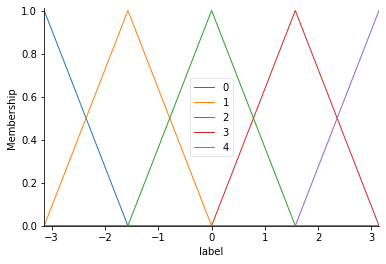

In [7]:
print("ФП для Y:")
ranges_Y = rules(Y[0], Y[-1], num_terms, 'label')

ФП для Z:


/home/franck-malko/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


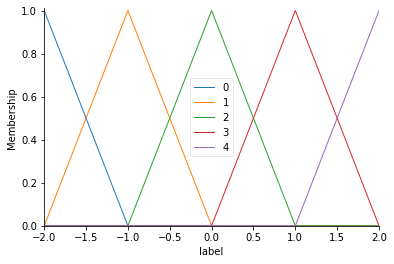

In [8]:
print("ФП для Z:")
ranges_Z = rules(Z[0], Z[-1], num_terms, 'label')

In [9]:
print('Параметры ФП')
fp_params_header = ['№', '1', '2', '3']
fp_params_table = []
for i in range(num_terms):
  print(ranges_X[i])
  fp_params_table.append([i + 1, ranges_X[i]['start'], ranges_X[i]['mid'], ranges_X[i]['end']])

print(tabulate(fp_params_table, fp_params_header))

Параметры ФП
{'start': -3.141592653589793, 'end': -2.356194490192345, 'mid': -3.141592653589793}
{'start': -2.356194490192345, 'end': -0.7853981633974483, 'mid': -1.5707963267948966}
{'start': -0.7853981633974483, 'end': 0.7853981633974483, 'mid': 0.0}
{'start': 0.7853981633974483, 'end': 2.356194490192345, 'mid': 1.5707963267948966}
{'start': 2.356194490192345, 'end': 3.141592653589793, 'mid': 3.141592653589793}
  №          1         2          3
---  ---------  --------  ---------
  1  -3.14159   -3.14159  -2.35619
  2  -2.35619   -1.5708   -0.785398
  3  -0.785398   0         0.785398
  4   0.785398   1.5708    2.35619
  5   2.35619    3.14159   3.14159


In [10]:
def calc_func(x, start, mid, end):
  if start <= x and x <= mid:
    return (x - start) / (mid - start)
  elif mid <= x and x <= end:
    return (x - end)/(mid - end)
  else:
    return 0

In [11]:
# База правил
number_X = 0
number_Y= 0
number_Z = 0
table = []
header = ['№', 'Параметр 1', 'Параметр 2', 'Значение']
for range_X in ranges_X:
  number_X += 1
  if 'number' not in range_X:
    range_X['number'] = number_X
  for range_Y in ranges_Y:
    number_Y += 1
    if 'number' not in range_Y:
      range_Y['number'] = number_Y
    x = (range_X['start'] + range_X['end']) / 2
    y = (range_Y['start'] + range_Y['end']) / 2
    z = y * math.sin(x+y)
    sum_func_chislitel = 0
    sum_func_znaminatel = 0
    
    for range_Z in ranges_Z:
      if range_Z['start'] <= z and z <= range_Z['end']:
        func_val = calc_func(x, range_X['start'], range_X['mid'], range_X['end'])
        sum_func_chislitel += func_val * z
        sum_func_znaminatel += func_val
        F = sum_func_chislitel / sum_func_znaminatel
        number_Z += 1
        table.append([number_Z, range_X['number'], range_Y['number'], F])

In [12]:
print('База правил:')
print(tabulate(table, headers=header))

База правил:
  №    Параметр 1    Параметр 2      Значение
---  ------------  ------------  ------------
  1             1             1  -1.94376
  2             1             2  -1.45123
  3             1             3   0
  4             1             4  -1.45123
  5             1             5   0
  6             2             2   1.92367e-16
  7             2             3   0
  8             2             4   0
  9             3             1   1.05196
 10             3             2   1.5708
 11             3             3   0
 12             3             4   1.5708
 13             3             5   1.05196
 14             4             2   0
 15             4             3   0
 16             4             4   1.92367e-16
 17             5             1   0
 18             5             2  -1.45123
 19             5             3   0
 20             5             4  -1.45123
 21             5             5  -1.94376
